In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

import seaborn as sns

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
#downloading the iris dataset, splitting it into train set and validation set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

df = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df2 = df
df2['type']  = df2['type'].replace({'Iris-setosa': 0})
df2['type']  = df2['type'].replace({'Iris-versicolor': 1})
df2['type']  = df2['type'].replace({'Iris-virginica': 2})
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')

In [ ]:
X = df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #predictors

y = df2[['type']] #target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
t1 = pd.crosstab(df2['type'], df2['sepal_length'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9,Total
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,4,2,5,4,8,8,3,1,5,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
1,0,0,0,0,0,0,1,2,1,1,0,1,5,5,5,3,2,4,4,2,3,2,1,2,3,1,1,1,0,0,0,0,0,0,0,50
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,3,1,2,2,2,6,5,4,0,5,2,3,0,1,3,1,1,1,4,1,50
Total,1,3,1,4,2,5,6,10,9,4,1,6,7,6,8,7,3,6,6,4,9,7,5,2,8,3,4,1,1,3,1,1,1,4,1,150


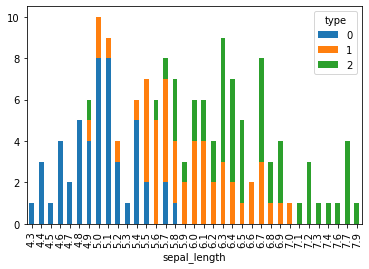

In [ ]:
t1_plot = pd.crosstab(df2['sepal_length'], df2['type'])
t1_plot.plot(kind='bar', stacked = True)

In [ ]:
NB = GaussianNB()  
nb_01 = NB.fit(X_train, y_train)   
y_predict = nb_01.predict(X_test)  
print("Accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Accuracy NB: 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test.index

Int64Index([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
             54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
             44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83],
           dtype='int64')

In [ ]:
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['predict'])

In [ ]:
y_predict.head()

,predict
114,2
62,1
33,0
107,2
7,0


In [ ]:
y_test.head()

,type
114,2
62,1
33,0
107,2
7,0


In [ ]:
dftest = pd.concat([y_test, y_predict])
df3 = dftest.head(25)
df3.head()

,type,predict
114,2.0,NaN
62,1.0,NaN
33,0.0,NaN
107,2.0,NaN
7,0.0,NaN


In [ ]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy=  "prior")#, Constant = 1)
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

 [Why using a dummy classifier?](https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549)

 To be able to truly understand and then improve our model’s performance, we first need to **establish a baseline** for the data that we have. After all, if we don’t know how our model is performing against a baseline, how can we improve it?

In [ ]:
print("Test accuracy (Naive Bayes) =", nb_01.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Naive Bayes) = 1.0

Test accuracy (Dummy Classifier) = 0.23684210526315788


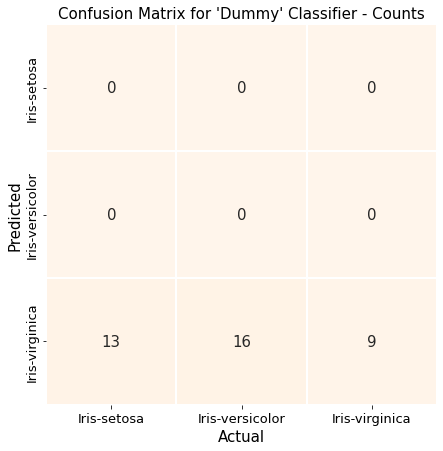

In [ ]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

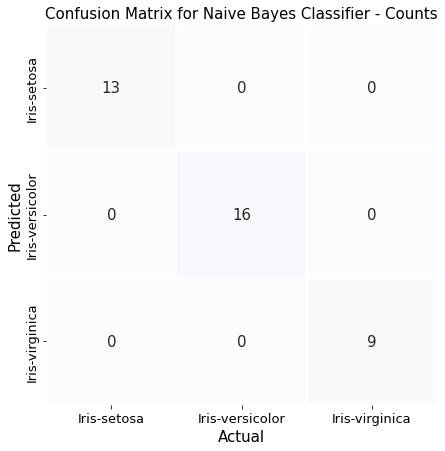

In [ ]:
#generate confusion matrix
cm_nb = confusion_matrix(y_test, y_predict)
#put it into a dataframe
cm_nb_df = pd.DataFrame(cm_nb)

#plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_nb_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for Naive Bayes Classifier - Counts", fontsize=15)
plt.show()

In [ ]:
X_test['sepal_length']

114    5.8
62     6.0
33     5.5
107    7.3
7      5.0
100    6.3
40     5.0
86     6.7
76     6.8
71     6.1
134    6.1
51     6.4
73     6.1
54     6.5
63     6.1
37     4.9
78     6.0
90     5.5
45     4.8
16     5.4
121    5.6
66     5.6
24     4.8
8      4.4
126    6.2
22     4.6
44     5.1
97     6.2
93     5.0
26     5.0
137    6.4
84     5.4
27     5.2
127    6.1
132    6.4
59     5.2
18     5.7
83     6.0
Name: sepal_length, dtype: float64

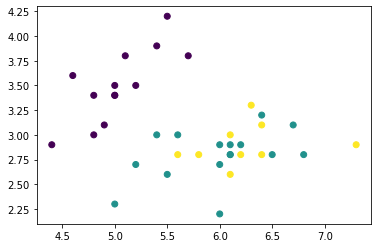

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sepal_length'], X_test['sepal_width'],c=y_test['type'])

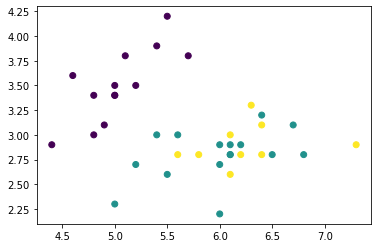

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sepal_length'], X_test['sepal_width'],c= y_predict['predict'])

# **My comments:**

  The purpose of this workbook is to predict the type of Iris by the sepal length, sepal width, petal length, and petal width.  The algorithm used for the prediction is Naïve Bayes.  Naïve Bayes classifier calculates the posterior probability of an event and uses this prior knowledge to make a prediction for the next event.

First of all, the author cleaned the data and replaced the type name by numeric number, which would be easier to read.  Next, the author used the default split (75% and 25%) to split data into training and testing.  The training dataset would be the prior knowledge for this Naïve Bayes algorithm.  When making a prediction for this dataset, the Gaussian Naïve Bayes model performs better than the non-linear model because the predictor values are continuous and are expected to follow a Gaussian distribution. The author then quickly comparted the first few records of the testing and prediction result.

The dummy classifier should be built because it creates a baseline to compare the performance of the algorithm.  Without it, we won’t be able to know how our model is performing against the baseline.  Therefore, the author created two confusion matrixes, one for dummy classifier and another one for Naïve Bayes classifier.  Comparing confusion matrixes can give you a better idea of what your classification model is getting right and what types of errors it is making.  For a better and more intuitive demonstration to the audience, the author made two scatter plots for the real values and the predictions, which did a good job and fit pretty well.

